# Programming basics


We teach R because it greatly facilitates data analysis, the main topic of this book. By coding in R, we can efficiently perform exploratory data analysis, build data analysis pipelines, and prepare data visualization to communicate results. However, R is not just a data analysis environment but a programming language. Advanced R programmers can develop complex packages and even improve R itself, but we do not cover advanced programming in this book. Nonetheless, in this section, we introduce three key programming concepts: conditional expressions, for-loops, and functions. These are not just key building blocks for advanced programming, but are sometimes useful during data analysis. We also note that there are several functions that are widely used to program in R but that we will not cover in this book. These include `split`, `cut`, `do.call`, and `Reduce`, as well as the __data.table__ package. These are worth learning if you plan to become an expert R programmer.

## Conditional expressions

Conditional expressions are one of the basic features of programming. They are used for what is called _flow control_. The most common conditional expression is the if-else statement. In R, we can actually perform quite a bit of data analysis without conditionals. However, they do come up occasionally, and you will need them once you start writing your own functions and packages.

Here is a very simple example showing the general structure of an if-else statement. The basic idea is to print the reciprocal of `a` unless `a` is 0:

In [5]:
a = 0
if (a!=0):
    print(1/a)
else:
    print("No reciprocal for 0.")

No reciprocal for 0.


Let's look at one more example using the US murders data frame:

In [35]:
import pandas as pd
url = "https://drive.google.com/file/d/1tKMnvQSEoanKybZf25ItHEcY1zjPqueF/view?usp=sharing"
cleaned_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
murders = pd.read_csv(cleaned_url)
murder_rate = murders["total"] / murders["population"]*100000

Here is a very simple example that tells us which states, if any, have a murder rate lower than 0.5 per 100,000. The `if` statement protects us from the case in which no state satisfies the condition.

In [36]:
import numpy as np
ind = np.argmin(murder_rate)
if (murder_rate[ind] < 0.5):
    print(murders["state"][ind])
else:
    print("No state has murder rate that low")

Vermont


If we try it again with a rate of 0.25, we get a different answer:

In [38]:
if (murder_rate[ind] < 0.25):
    print(murders["state"][ind])
else:
    print("No state has a murder rate that low.")

No state has a murder rate that low.


A related function that is very useful is `ifelse`. This function takes three arguments: a logical and two possible answers. If the logical is `TRUE`, the value in the second argument is returned and if `FALSE`, the value in the third argument is returned. Here is an example:

In [9]:
a = 0
if (a > 0):
    print(1/a)
else:
    print('NaN')

NaN


The function is particularly useful because it works on vectors. It examines each entry of the logical vector and returns elements from the vector provided in the second argument, if the entry is `TRUE`, or elements from the vector provided in the third argument, if the entry is `FALSE`.

In [10]:
a = [0, 1, 2, -4, 5]
# Python does not have a true equivalent of R's ifelse statement
for value in a:
    if (value > 0):
        print(1/value)
    else:
        print('NaN')

NaN
1.0
0.5
NaN
0.2


This table helps us see what happened:

```
tmp <- data.frame(a = a, is_a_positive = a > 0, answer1 = 1/a, answer2 = NA, result = result)
if(knitr::is_html_output()){
  knitr::kable(tmp, "html") %>%
    kableExtra::kable_styling(bootstrap_options = "striped", full_width = FALSE)
} else{
  knitr::kable(tmp, "latex", booktabs = TRUE) %>%
    kableExtra::kable_styling(font_size = 8)
}
```

In [11]:
# Create table

Two other useful functions are `any` and `all`. The `any` function takes a vector of logicals and returns `TRUE` if any of the entries is `TRUE`. The `all` function takes a vector of logicals and returns `TRUE` if all of the entries are `TRUE`. Here is an example:

In [13]:
z = [True, True, False]
print(any(z))
print(all(z))

True
False


## Defining functions

As you become more experienced, you will find yourself needing to perform the same operations over and over. A simple example is computing averages. We can compute the average of a vector `x` using the `sum` and `length` functions: `sum(x)/length(x)`. Because we do this repeatedly, it is much more efficient to write a function that performs this operation. This particular operation is so common that someone already wrote the `mean` function and it is included in base R. However, you will encounter situations in which the function does not already exist, so R permits you to write your own. A simple version of a function that computes the average can be defined like this:

In [14]:
def avg(x):
    s = sum(x)
    n = len(x)
    print(s/n)

Now `avg` is a function that computes the mean:

In [15]:
x = range(1,101)
print(np.mean(x)==avg(x))

50.5
False


Notice that variables defined inside a function are not saved in the workspace. So while we use `s` and `n` when we call `avg`, the values are created and changed only during the call. Here is an illustrative example:

In [16]:
s = 3
print(avg(range(1,11)))
print(s)

5.5
None
3


```
def function(VARIABLE_NAME):
  perform operations on VARIABLE_NAME and calculate VALUE
  return VALUE
```

The functions you define can have multiple arguments as well as default values. For example, we can define a function that computes either the arithmetic or geometric average depending on a user defined variable like this:

In [17]:
def avg(x, arithmetic = True):
  n = len(x)
  if arithmetic == True:
    return sum(x)/n
  else:
    return np.prod(x)^(1/n)


We will learn more about how to create functions through experience as we face more complex tasks.

## Namespaces

Once you start becoming more of an R expert user, you will likely need to load several add-on packages for some of your analysis. Once you start doing this, it is likely that two packages use the same name for two different functions. And often these functions do completely different things. In fact, you have already encountered this because both __dplyr__ and the R-base  __stats__ package define a `filter` function.  There are five other examples in __dplyr__. We know this because when we first load __dplyr__ we see the following message:

The following objects are masked from ‘package:stats’:
    filter, lag
The following objects are masked from ‘package:base’:
    intersect, setdiff, setequal, union

So what does R do when we type `filter`? Does it use the __dplyr__ function or the __stats__ function? From our previous work we know it uses the __dplyr__ one. But what if we want to use the __stats__ version?

These functions live in different _namespaces_. R will follow a certain order when searching for a function in these _namespaces_. You can see the order by typing:

```{code-cell} r
search()
```

The first entry in this list is the global environment which includes all the objects you define. 

So what if we want to use the __stats__ `filter` instead of the __dplyr__ filter but __dplyr__ appears first in the search list? You can force the use of a specific namespace by using double colons (`::`) like this:

```{code-cell} r
stats::filter
```

If we want to be absolutely sure that we use the __dplyr__ `filter`, we can use

```{code-cell} r
dplyr::filter
```

Also note that if we want to use a function in a package without loading the entire package, we can use the double colon as well.

For more on this more advanced topic we recommend the R packages book^[http://r-pkgs.had.co.nz/namespace.html].

## For-loops

The formula for the sum of the series $1+2+\dots+n$ is $n(n+1)/2$. What if we weren't sure that was the right function? How could we check? Using what we learned about functions we can create one that computes the $S_n$:

In [18]:
def compute_s_n(n):
  x = range(1,n+1)
  return sum(x)

How can we compute $S_n$ for various values of $n$, say $n=1,\dots,25$? Do we write 25 lines of code calling `compute_s_n`? No, that is what for-loops are for in programming. In this case, we are performing exactly the same task over and over, and the only thing that is changing is the value of $n$. For-loops let us define the range that our variable takes (in our example $n=1,\dots,10$), then change the value and evaluate expression as you _loop_. 

Perhaps the simplest example of a for-loop is this useless piece of code:

In [19]:
for i in range(1,6):
  print(i)

1
2
3
4
5


Here is the for-loop we would write for our $S_n$ example:

In [41]:
m = 25
s_n = np.empty(25, dtype=object)
for n in range(1,m):
  s_n[n] = compute_s_n(n)

In each iteration $n=1$, $n=2$, etc..., we compute $S_n$ and store it in the $n$th entry of `s_n`.

Now we can create a plot to search for a pattern:

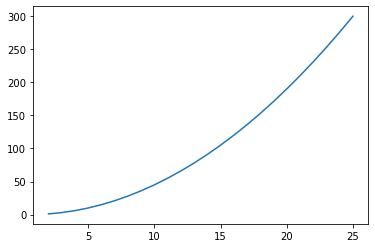

In [21]:
import matplotlib.pyplot as plt
n = range(1, m+1)
plt.plot(n,s_n)
plt.show()

If you noticed that it appears to be a quadratic, you are on the right track because the formula is $n(n+1)/2$.

<!--
which we can confirm with a table:
```{code-cell} r
head(data.frame(s_n = s_n, formula = n*(n+1)/2))
```
We can also overlay the two results by using the function `lines` to draw a line over the previously plotted points:
```{r s_n-v-n}
plot(n, s_n)
lines(n, n*(n+1)/2)
```
-->

## Vectorization and functionals

Although for-loops are an important concept to understand, in R we rarely use them. As you learn more R, you will realize that _vectorization_ is preferred over for-loops since it results in shorter and clearer code. We already saw examples in the Vector Arithmetic section. A _vectorized_ function is a function that will apply the same operation on each of the vectors.

In [23]:
x = range(1,11)
print(np.sqrt(x))
y = range(1,11)
print(np.multiply(x,y))

[1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.         3.16227766]
[  1   4   9  16  25  36  49  64  81 100]


To make this calculation, there is no need for for-loops. However, not all functions work this way. For instance, the function we just wrote, `compute_s_n`, does not work element-wise since it is expecting a scalar. This piece of code does not run the function on each entry of `n`:

```
n = range(1,26)
compute_s_n(n)
```

_Functionals_ are functions that help us apply the same function to each entry in a vector, matrix, data frame, or list. Here we cover the functional that operates on numeric, logical, and character vectors: `sapply`.

The function `sapply` permits us to perform element-wise operations on any function. Here is how it works:

In [ ]:
x = range(1,11)
print(list(map(np.sqrt, x))) # map returns a map object, so we must pass it to list() to view the contents

Each element of `x` is passed on to the function `sqrt` and the result is returned. These results are concatenated. In this case, the result is a vector of the same length as the original `x`. This implies that the for-loop above can be written as follows:

In [ ]:
n = range(1,26)
s_n = map(compute_s_n, n)

Other functionals are `apply`, `lapply`, `tapply`, `mapply`, `vapply`, and `replicate`. We mostly use `sapply`, `apply`, and `replicate` in this book, but we recommend familiarizing yourselves with the others as they can be very useful.

## Exercises 

1\. What will this conditional expression return?

```{code-cell} r
x <- c(1,2,-3,4)
if(all(x>0)){
  print("All Postives")
} else{
  print("Not all positives")
}
```


2\. Which of the following expressions is always `FALSE` when at least one entry of a logical vector `x` is TRUE?

a. `all(x)`
b. `any(x)`
c. `any(!x)`
d. `all(!x)`

3\. The function `nchar` tells you how many characters long a character vector is. Write a line of code that assigns to the object `new_names` the state abbreviation when the state name is longer than 8 characters.
    
  
4\. Create a function `sum_n` that for any given value, say $n$, computes the sum of the integers from 1 to n (inclusive). Use the function to determine the sum of integers from 1 to 5,000.

5\. Create a function `altman_plot` that takes two arguments, `x` and `y`, and plots the difference against the sum.
  
6\. After running the code below, what is the value of `x`?

```{code-cell} r
x <- 3
my_func <- function(y){
  x <- 5
  y+5
}
```

7\. Write a function `compute_s_n` that for any given $n$ computes the sum $S_n = 1^2 + 2^2 + 3^2 + \dots n^2$. Report the value of the sum when $n=10$.
 
8\. Define an empty numerical vector `s_n` of size 25 using `s_n <- vector("numeric", 25)` and store in the results of $S_1, S_2, \dots S_{25}$ using a for-loop.

9\. Repeat exercise 8, but this time use `sapply`.

10\. Repeat exercise 8, but this time use `map_dbl`.

11\. Plot $S_n$ versus $n$. Use points defined by $n=1,\dots,25$.

12\. Confirm that the formula for this sum is $S_n= n(n+1)(2n+1)/6$.